In [2]:
import spikeinterface.full as si
import probeinterface as pif
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as scio
import os

Text(0.5, 1.0, 'NPX 1')

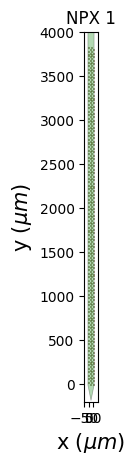

In [3]:
# path to meta file
meta_filename = os.path.join('F:', 'RR2_NPX_data', 'sub-M388', 'M388-2023-11-20_2_g0', \
    'M388-2023-11-20_2_g0_imec0', 'M388-2023-11-20_2_g0_tcat.imec0.ap.meta' )
probe = pif.read_spikeglx(meta_filename)
fig,ax = plt.subplots()
pif.plotting.plot_probe(probe, ax=ax)
ax.set_ylim([-200, 4000])
ax.set_title('NPX 1')


In [4]:
raw_rec = si.read_spikeglx(os.path.join('F:', 'RR2_NPX_data', 'sub-M388', 'M388-2023-11-20_2_g0', \
    'M388-2023-11-20_2_g0_imec0'), stream_name='imec0.ap')
# non_neuronal = si.read_spikeglx(npx_path, stream_name='nidq', all_annotations=True)
# Turns out only the the analog streams are read from thhe .nidq file, and not the digital events.

In [5]:
rec1 = si.highpass_filter(raw_rec, freq_min=400.)
bad_channel_ids, channel_labels = si.detect_bad_channels(rec1)
print('bad_channel_ids, channel_labels')
for bad_channel_id in bad_channel_ids:
    index = int(bad_channel_id.split('AP')[1])
    print('{}, {}'.format(bad_channel_id, channel_labels[index]))


bad_channel_ids, channel_labels
imec0.ap#AP191, dead
imec0.ap#AP366, out
imec0.ap#AP367, out
imec0.ap#AP368, out
imec0.ap#AP369, out
imec0.ap#AP370, out
imec0.ap#AP371, out
imec0.ap#AP372, out
imec0.ap#AP373, out
imec0.ap#AP374, out
imec0.ap#AP375, out
imec0.ap#AP376, out
imec0.ap#AP377, out
imec0.ap#AP378, out
imec0.ap#AP379, out
imec0.ap#AP380, out
imec0.ap#AP381, out
imec0.ap#AP382, out
imec0.ap#AP383, out


In [6]:
# Channels labeled 'out' make sense, not sure about the one marked 'dead' -- removing in any case (Confirm by viewing in SpikeGLX viewer)
rec1  = rec1.remove_channels(bad_channel_ids)
# rec1 = si.phase_shift(rec1) # No need to phase_shift it tcat has already been applied

# Preparing for Kilo-sort

Kilosort needs a binary file and the code segment below

In [7]:
ks_working_folder = 'F:\\Temp' # Make sure this folder does not exist
job_kwargs = dict(n_jobs=20, chunk_duration='1s', progress_bar=True)
rec1 = rec1.save(folder=ks_working_folder, format='binary', **job_kwargs)

write_binary_recording with n_jobs = 20 and chunk_size = 30000


write_binary_recording:   0%|          | 0/1592 [00:00<?, ?it/s]

In [ ]:
# Hacky Step
rec.set_channel_locations(rec4.get_channel_locations())

In [ ]:
rec = si.BinaryRecordingExtractor('F:\\ks2_test\\preprocess\\traces_cached_seg0.raw', 30000, 'int16', 382)

In [ ]:
ks2_path = 'D:\\AutomaticSpikeSort\Kilosort-2_5'
si.Kilosort2_5Sorter.set_kilosort2_5_path(ks2_path)
si.Kilosort2_5Sorter.is_installed()

In [ ]:
ks2_5_params = si.get_default_sorter_params('kilosort2_5')

In [ ]:
sorting = si.run_sorter('kilosort2_5', rec, output_folder=os.path.join(ks_working_folder, 'ks2_output'),
                        verbose=True, remove_existing_folder=False, **ks2_5_params)

In [ ]:
np.shape(rec.get_channel_locations())

'nidq#AX4' is the odor TTL\
'nidq#AX1' is a quadrature signal\
'nidq#AX2' is a quadrature signal

In [ ]:
this_ids = ['nidq#XA1', 'nidq#XA2', 'nidq#XA4']
this_gain = [ttls.get_channel_property(channel_id=x, key='gain_to_uV') for x in this_ids]
this_offset = [ttls.get_channel_property(channel_id=x, key='offset_to_uV') for x in this_ids]

In [ ]:
# TODO Plot quadrature signals and decoded speed
plt.plot(ttls.get_traces(channel_ids=[this_ids[0]])*this_gain[0] + this_offset[0])
plt.plot(ttls.get_traces(channel_ids=[this_ids[1]])*this_gain[1] + this_offset[1])

In [ ]:
this_signal = ttls.get_traces(channel_ids=[this_ids[2]])*this_gain[2] + this_offset[2]
plt.plot(this_signal)
plt.axhline(np.mean(this_signal) + np.std(this_signal), color='black')
plt.axhline(np.mean(this_signal) - np.std(this_signal), color='red')
plt.axhline(np.mean(this_signal) - 2.5*np.std(this_signal), color='green')
plt.axhline(np.mean(this_signal) - 3.5*np.std(this_signal), color='black')

In [ ]:
#The onset times are such that they are less than 2.5 SDs 
#and greater than 3.5 SDs but also the previous time should be  greater than 2.5 SDs
thresh1 = np.mean(this_signal) - 2.5*np.std(this_signal);
thresh2 = np.mean(this_signal) - 3.5*np.std(this_signal);

In [ ]:
temp_idx = np.argwhere((this_signal < thresh1) & (this_signal > thresh2))

In [ ]:
temp_idx = [x[0] for x in temp_idx]

In [ ]:
np.take(this_signal, temp_idx)

In [ ]:
np.shape(onset_idx)

In [ ]:
np.shape(this_signal)

In [ ]:
fig, ax = plt.subplots(figsize=(15, 10))
si.plot_probe_map(raw_rec, ax=ax, with_channel_ids=False)
ax.set_ylim(-100, 4000)

In [ ]:
bad_channel_ids, channel_labels = si.detect_bad_channels(raw_rec)

In [ ]:
channel_labels